##  1. Import the required libraries and load the training and testing dataset

In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# Importing the Training Dataset

train_1 = pd.read_csv('/content/train.csv')

In [ ]:
train_1.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
#Importing the Training 2 Datasets

train_2 = pd.read_csv('/content/train_label.csv')

In [ ]:
train_2.head(3)

,Total_Booking
0,504
1,5
2,139


In [ ]:
# Joining the Training data sets

train_set = pd.concat([train_1,train_2],axis=1,join='inner')

In [ ]:
# Create a new Training datasets by creating the .csv file

train_set.to_csv('training_set')
training_set = pd.read_csv('/content/training_set')

In [ ]:
training_set.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
training_set.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
#Importing the Testing Datasets

test_1 = pd.read_csv('/content/test.csv')
test_2 = pd.read_csv('/content/test_label.csv')

In [ ]:
#concatenate both the test data sets

testing_set = pd.concat([test_1,test_2],axis=1)

In [ ]:
testing_set.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11


# 2.a Checking the shape of Training and Testing Datasets

In [ ]:
# Shape of both the datasets

training_set.shape,testing_set.shape

((8708, 10), (2178, 10))

## 2.b Print the data-types of each column

In [ ]:
# Datatype of each column in both the datasets

# Datatype of Training dataset

training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_Booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [ ]:
# Datatype of Testing Dataset

testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2178 non-null   object 
 1   season         2178 non-null   object 
 2   holiday        2178 non-null   int64  
 3   workingday     2178 non-null   int64  
 4   weather        2178 non-null   object 
 5   temp           2178 non-null   float64
 6   atemp          2178 non-null   float64
 7   humidity       2178 non-null   int64  
 8   windspeed      2178 non-null   float64
 9   Total_Booking  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


## 2.c  Checking the Missing values in the Dataset

In [ ]:
# check the missing values in the data-set

print("Null values in the Training Data set \n")
training_set.isnull().sum()

Null values in the Training Data set 



datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [ ]:
print("Null values in the test data set \n")
testing_set.isnull().sum()

Null values in the test data set 



datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

## 3.a  Create new columns date, hour, weekDay, month from datetime column

In [ ]:
#Creating new columns date, hour, weekDay, month from datetime column

training_set['date'] = pd.DatetimeIndex(training_set['datetime']).date
training_set["day"] = pd.DatetimeIndex(training_set['datetime']).day_name()
training_set['month'] = pd.DatetimeIndex(training_set['datetime']).month_name()
training_set['hour'] = pd.DatetimeIndex(training_set['datetime']).hour

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_Booking  8708 non-null   int64  
 10  date           8708 non-null   object 
 11  day            8708 non-null   object 
 12  month          8708 non-null   object 
 13  hour           8708 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 952.6+ KB


## 3.c  Drop the datetime column as we have already extracted useful features from it

In [ ]:
# Deleting the datetime feature

del training_set['datetime']

## 3.b  Coerce the datatype of season, holiday, workingday, and weather to category

In [ ]:
# Conversion to Categorical Variables
training_set['season'] = training_set['season'].astype('category')
training_set['holiday'] = training_set['holiday'].astype('category')
training_set['workingday'] = training_set['workingday'].astype('category')
training_set['weather'] = training_set['weather'].astype('category')

In [ ]:
training_set.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking       int64
date               object
day                object
month              object
hour                int64
dtype: object

# ***Outlier Analysis***

## 4.a  Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

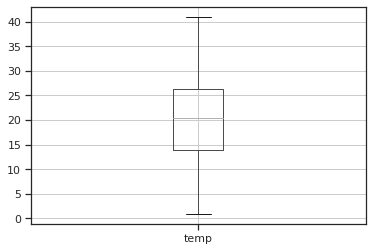

In [ ]:
#plotting Box for the feature temp

training_set.boxplot(column='temp')

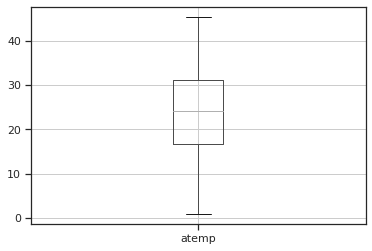

In [ ]:
#plotting box for the column atemp

training_set.boxplot(column = 'atemp')

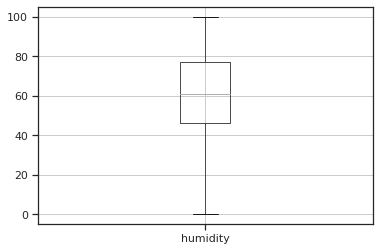

In [ ]:
#plotting Box for the feature humidity

training_set.boxplot(column = 'humidity')

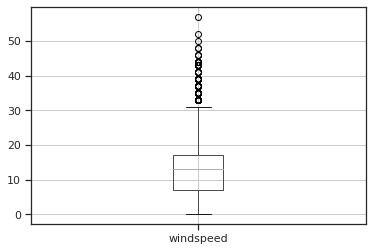

In [ ]:
#Plotting Box for the feature Windspeed

training_set.boxplot(column = 'windspeed')

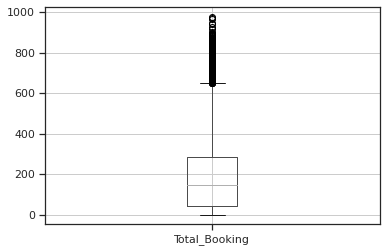

In [ ]:
#Plotting Box for the feature Total_Booking

training_set.boxplot(column = 'Total_Booking')

# ***Inference Notes***


we are going to use IQR approach to remove outlier from the feaure windspeed.

1.   There was no outlier present for the columns temp,atemp, humidity.
2.   There is a lot of outlier found in the column windspeed and Total Booking.
3.   we are going to use IQR approach to remove outlier from the feaure windspeed and Total-Booking




## 4.b  Remove the outliers present in the dataset

In [ ]:
# Finding the IQR range for windspeed

Q1 = training_set.windspeed.quantile(0.25)
Q3 = training_set.windspeed.quantile(0.75)
IQR = Q3 - Q1
print("The InterQuantile range for the feature windspeed : ",IQR)

The InterQuantile range for the feature windspeed :  9.996400000000001


In [ ]:
outlier_windspeed = training_set[(training_set['windspeed'] <= (Q1 - 1.5 * IQR)) | (training_set['windspeed'] >= (Q3 + 1.5 * IQR))]
outlier_windspeed

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
10,Spring,0,1,Clear + Few clouds,18.04,21.970,62,32.9975,129,2012-01-17,Tuesday,January,15
32,Fall,0,1,Clear + Few clouds,31.98,36.365,55,32.9975,176,2011-07-12,Tuesday,July,9
86,Spring,0,0,Clear + Few clouds,8.20,8.335,32,32.9975,95,2011-01-08,Saturday,January,14
105,Fall,0,1,Mist + Cloudy,27.06,30.305,83,36.9974,672,2012-09-18,Tuesday,September,8
182,Spring,0,1,Clear + Few clouds,13.94,14.395,36,35.0008,88,2012-01-18,Wednesday,January,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8496,Fall,0,1,"Light Snow, Light Rain",31.16,34.850,55,32.9975,376,2012-07-03,Tuesday,July,20
8555,Spring,0,1,Clear + Few clouds,9.02,9.090,47,36.9974,48,2011-02-08,Tuesday,February,10
8563,Winter,0,1,Clear + Few clouds,19.68,23.485,33,32.9975,218,2012-12-05,Wednesday,December,14
8603,Spring,0,1,Clear + Few clouds,10.66,10.605,33,35.0008,154,2012-01-13,Friday,January,13


There are total 182 outliers in the Windspeed column

In [ ]:
train_set_clean_1 = training_set[~((training_set['windspeed'] <= (Q1 - 1.5 * IQR)) | (training_set['windspeed'] >= (Q3 + 1.5 * IQR)))]

In [ ]:
train_set_clean_1.shape

(8526, 13)

In [ ]:
# Finding the IQR range for TotalBooking

Q1 = train_set_clean_1.Total_Booking.quantile(0.25)
Q3 = train_set_clean_1.Total_Booking.quantile(0.75)
IQR = Q3 - Q1
print("The InterQuantile range for the feature Total_speed : ",IQR)

The InterQuantile range for the feature Total_speed :  243.0


In [ ]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
lower_limit,upper_limit

(-321.5, 650.5)

In [ ]:
outlier_Total_booking = train_set_clean_1[(train_set_clean_1['Total_Booking'] <= lower_limit) | (train_set_clean_1['Total_Booking'] >= upper_limit )]
outlier_Total_booking

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,2012-08-17,Friday,August,17
27,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,2012-05-02,Wednesday,May,18
30,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,2012-07-10,Tuesday,July,17
52,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,2012-06-05,Tuesday,June,18
70,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,2012-05-18,Friday,May,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,2012-03-14,Wednesday,March,8
8582,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,2012-10-15,Monday,October,8
8676,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,2012-05-12,Saturday,May,13
8681,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,2012-08-08,Wednesday,August,17


There are total 235 outliers in the Total_Booking column

In [ ]:
#train_set_clean_1 = training_set[~((training_set['windspeed'] <= (Q1 - 1.5 * IQR)) | (training_set['windspeed'] >= (Q3 + 1.5 * IQR)))]

train_set_clean_2 = train_set_clean_1[~((train_set_clean_1['Total_Booking'] <=lower_limit) | (train_set_clean_1['Total_Booking'] >= upper_limit))]

In [ ]:
train_set_clean_2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,Wednesday,May,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,Wednesday,September,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,Thursday,January,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,Friday,November,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,Tuesday,September,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,Monday,January,6
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,Thursday,November,1
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,Tuesday,April,3
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,Wednesday,November,1


In [ ]:
train_df = pd.DataFrame(train_set_clean_2)
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,Wednesday,May,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,Wednesday,September,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,Thursday,January,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,Friday,November,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,Tuesday,September,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,Monday,January,6
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,Thursday,November,1
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,Tuesday,April,3
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,Wednesday,November,1


# ***5. Performing the Correlation Analysis***

In [ ]:
# Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]

corr = train_df[['Total_Booking','temp','atemp','humidity','windspeed']].corr()

In [ ]:
corr

,Total_Booking,temp,atemp,humidity,windspeed
Total_Booking,1.000000,0.386336,0.383333,-0.318384,0.117670
temp,0.386336,1.000000,0.985352,-0.059516,-0.012856
atemp,0.383333,0.985352,1.000000,-0.039574,-0.052472
humidity,-0.318384,-0.059516,-0.039574,1.000000,-0.301955
windspeed,0.117670,-0.012856,-0.052472,-0.301955,1.000000


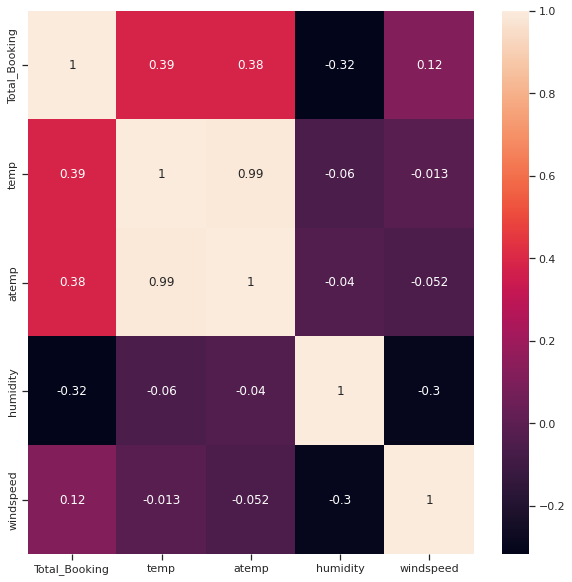

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="ticks", color_codes=True)
dataplots = sns.heatmap(corr,annot=True)
plt.show()

Inference:


1.   Temp and atemp are highly correlated, so either of them can be drop.

In [ ]:
train_df = train_df.drop('atemp',axis=1)
train_df

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_Booking,date,day,month,hour
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,2012-05-02,Wednesday,May,19
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,2012-09-05,Wednesday,September,4
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,2011-01-13,Thursday,January,9
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,2011-11-18,Friday,November,16
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,2011-09-13,Tuesday,September,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,54,6.0032,13,2012-01-16,Monday,January,6
8704,Winter,0,1,Mist + Cloudy,16.40,87,0.0000,11,2011-11-10,Thursday,November,1
8705,Summer,0,1,Mist + Cloudy,23.78,56,8.9981,1,2011-04-12,Tuesday,April,3
8706,Winter,0,1,Mist + Cloudy,11.48,61,16.9979,92,2012-11-07,Wednesday,November,1


# ***6. Perform Data Visualization***

## 6.a  Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

In [ ]:
# Visualize distribution of data: total_booking column

train_df['Total_Booking'].describe()

count    8291.000000
mean      177.119407
std       156.753214
min         1.000000
25%        40.000000
50%       140.000000
75%       272.000000
max       650.000000
Name: Total_Booking, dtype: float64

Text(0.5, 0, 'Total booking')

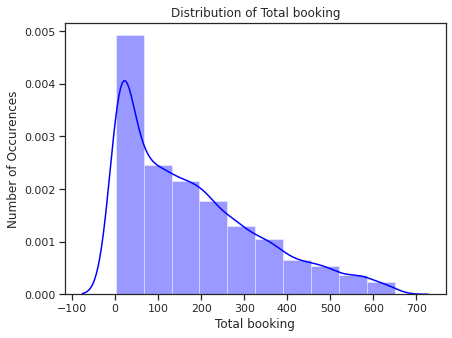

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_df['Total_Booking'], bins = 10, color="blue", kde=True)
plt.title("Distribution of Total booking")
plt.ylabel("Number of Occurences")
plt.xlabel("Total booking")

## 6.b  Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

Text(0, 0.5, 'Total number of bookings')

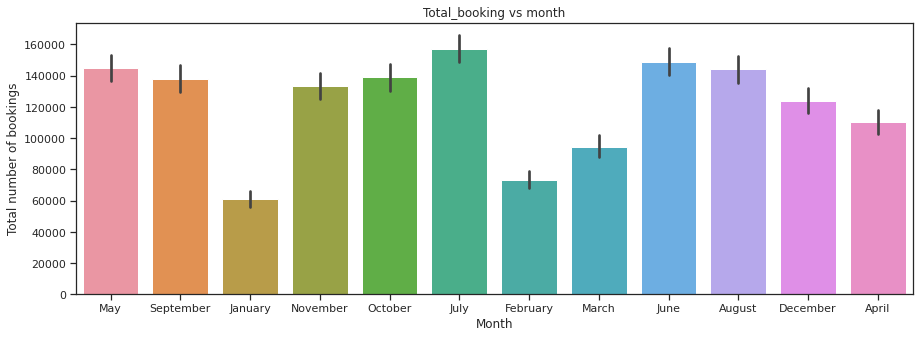

In [ ]:
# Visualize Total booking with Month

plt.figure(figsize=(15,5))
sns.barplot(x='month', y='Total_Booking', estimator = sum, data = train_df)
plt.title("Total_booking vs month")
plt.xlabel("Month")
plt.ylabel("Total number of bookings")

Text(0, 0.5, 'Total number of bookings')

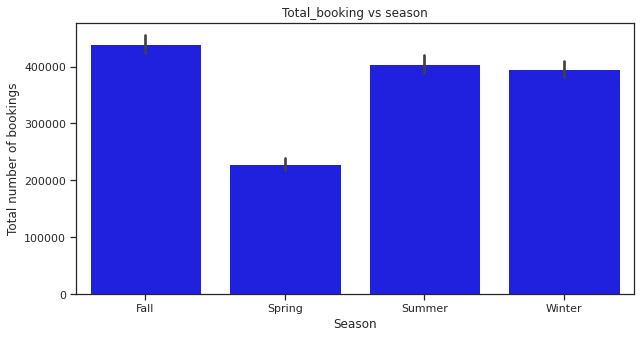

In [ ]:
# Visualize Total booking with Season

plt.figure(figsize=(10,5))
sns.barplot(x='season', y='Total_Booking', estimator = sum, data = train_df, color='blue')
plt.title("Total_booking vs season")
plt.xlabel("Season")
plt.ylabel("Total number of bookings")

Text(0, 0.5, 'Average Total number of bookings per hour')

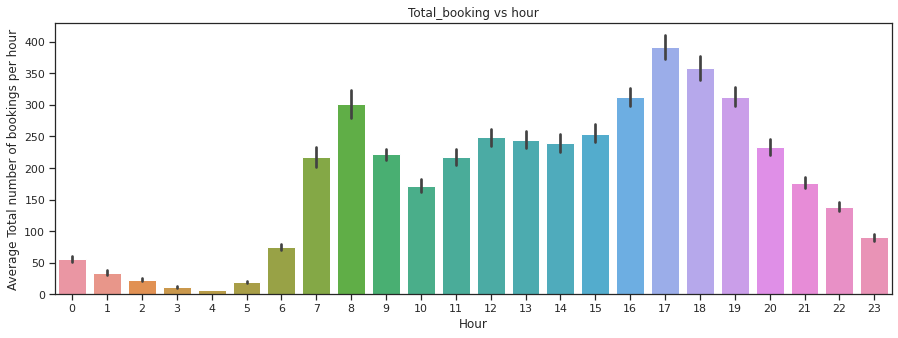

In [ ]:
# Visualize Total_Booking with Hour

#train_df['month'] = train_df[train_df['month'].sort_values(by = 'Month')]
plt.figure(figsize=(15,5))
sns.barplot(x='hour', y='Total_Booking', estimator = np.mean, data =train_df )
plt.title("Total_booking vs hour")
plt.xlabel("Hour")
plt.ylabel("Average Total number of bookings per hour")

Text(0, 0.5, 'Total number of bookings')

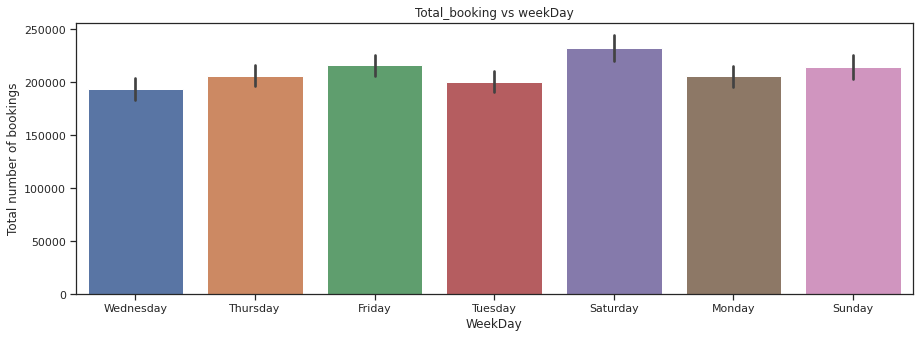

In [ ]:
# Visualize Total Booking with Weekday

plt.figure(figsize=(15,5))
sns.barplot(x='weekDay', y='Total_booking', estimator = sum, data=new_df)
plt.title("Total_booking vs weekDay")
plt.xlabel("WeekDay")
plt.ylabel("Total number of bookings")

Text(0, 0.5, 'Total number of bookings')

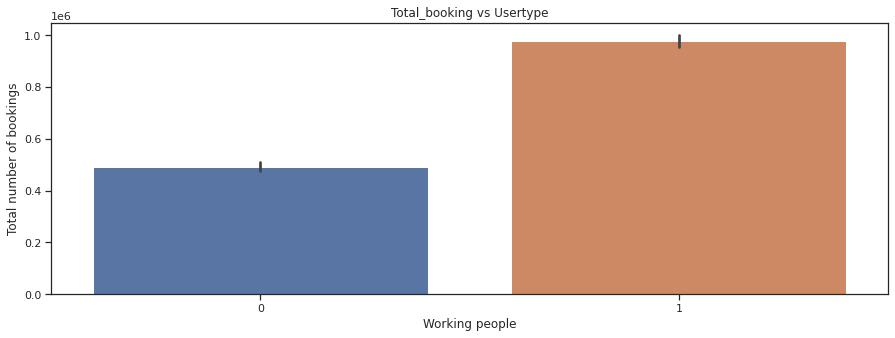

In [ ]:
#Visualize Total Booking with UserType

plt.figure(figsize=(15,5))
sns.barplot(x='workingday', y='Total_Booking', estimator = sum, data = train_df)
plt.title("Total_booking vs Usertype")
plt.xlabel("Working people")
plt.ylabel("Total number of bookings")

## 6.c  Use Histograms to plot all the continuous variables present in the data

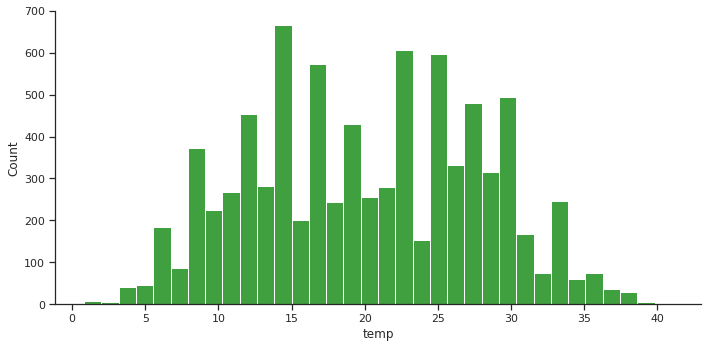

In [ ]:
# Histogram for temp

sns.displot(data = train_df, x='temp', kind='hist', height=5, aspect=2, color='green')

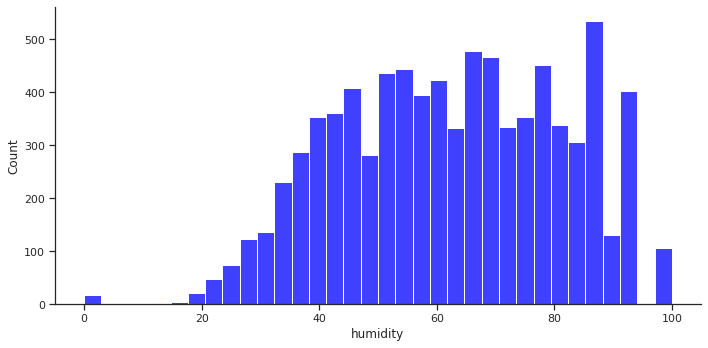

In [ ]:
# Histogram for humidity

sns.displot(data = train_df, x='humidity', kind='hist', height=5, aspect=2, color='blue')

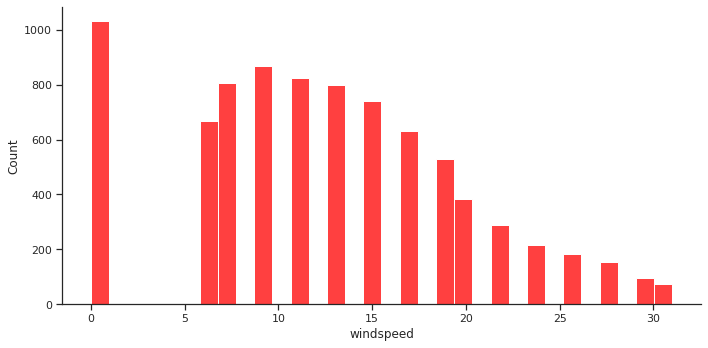

In [ ]:
# Histogram for Windspeed

sns.displot(data = train_df, x='windspeed', kind='hist', height=5, aspect=2, color='red')

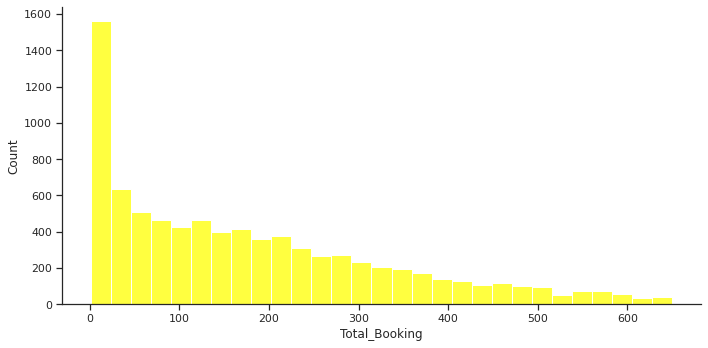

In [ ]:
# Histogram for Total Booking

sns.displot(data = train_df, x='Total_Booking', kind='hist', height=5, aspect=2, color='yellow')

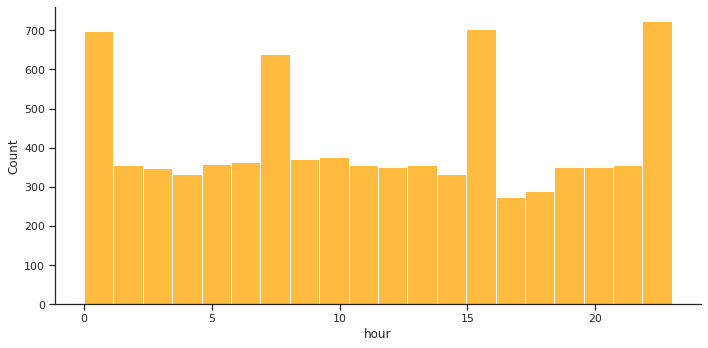

In [ ]:
# Histogram for Hour

sns.displot(data = train_df, x='hour', kind='hist', height=5, aspect=2, color='orange')

In [ ]:
train_df.head(3)

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_Booking,date,day,month,hour
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,2012-05-02,Wednesday,May,19
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,2012-09-05,Wednesday,September,4
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,2011-01-13,Thursday,January,9


In [ ]:
train_df = train_df.drop('date',axis=1)

# ***7.Convert the categorical variables into one hot vector***

In [ ]:
one_hot_encoded_data = pd.get_dummies(train_df, columns = ['month','day','weather','season'])
print(one_hot_encoded_data)

     holiday workingday   temp  humidity  windspeed  Total_Booking  hour  \
0          0          1  22.14        77    16.9979            504    19   
1          0          1  28.70        79    19.0012              5     4   
2          0          1   5.74        50    22.0028            139     9   
3          0          1  13.94        29     8.9981            209    16   
4          0          1  30.34        51    19.0012            184    13   
...      ...        ...    ...       ...        ...            ...   ...   
8703       1          0   4.10        54     6.0032             13     6   
8704       0          1  16.40        87     0.0000             11     1   
8705       0          1  23.78        56     8.9981              1     3   
8706       0          1  11.48        61    16.9979             92     1   
8707       0          1   5.74        50    19.9995             31    10   

      month_April  month_August  month_December  ...  day_Tuesday  \
0               0 

In [ ]:
train_df_encoded = pd.DataFrame(one_hot_encoded_data)
train_df_encoded

,holiday,workingday,temp,humidity,windspeed,Total_Booking,hour,month_April,month_August,month_December,...,day_Tuesday,day_Wednesday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,season_Fall,season_Spring,season_Summer,season_Winter
0,0,1,22.14,77,16.9979,504,19,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,0,1,28.70,79,19.0012,5,4,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,1,5.74,50,22.0028,139,9,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,13.94,29,8.9981,209,16,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,30.34,51,19.0012,184,13,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,0,4.10,54,6.0032,13,6,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8704,0,1,16.40,87,0.0000,11,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8705,0,1,23.78,56,8.9981,1,3,1,0,0,...,1,0,0,0,0,1,0,0,1,0
8706,0,1,11.48,61,16.9979,92,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


# ***8. Split your dataset for training and testing***

In [ ]:
# X and Y values

X = train_df_encoded.drop('Total_Booking', axis=1)
Y = train_df_encoded['Total_Booking']

In [ ]:
# Split the dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6218, 33) (2073, 33) (6218,) (2073,)


# ***9. Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)***

In [ ]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train,Y_train)
Y_pred_rf = model_rf.predict(X_test)

In [ ]:
#Random Forest Regressor Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_rf = mean_squared_error(Y_test,Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf = r2_score(Y_test,Y_pred_rf)
print('RMSE for Random Forest Model with test dataset is: ',np.round(rmse_rf,4))
print('R-Squared for the Random Forest Model with test dataset is : ',np.round(r_squared_rf,4))

RMSE for Random Forest Model with test dataset is:  59.7715
R-Squared for the Random Forest Model with test dataset is :  0.8558


In [ ]:
# Ada Boost Regressor

from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor()
model_ada.fit(X_train,Y_train)
Y_pred_ada = model_ada.predict(X_test)

In [ ]:
#Ada Boost Regressor Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_ada = mean_squared_error(Y_test,Y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r_squared_ada = r2_score(Y_test,Y_pred_ada)
print('RMSE for Ada Boost Regressor Model with test dataset is: ',np.round(rmse_ada,4))
print('R-Squared for the Ada Boost Regressor Model with test dataset is : ',np.round(r_squared_ada,4))

RMSE for Ada Boost Regressor Model with test dataset is:  109.5266
R-Squared for the Ada Boost Regressor Model with test dataset is :  0.5159


In [ ]:
#Bagging Regressor

from sklearn.ensemble import BaggingRegressor

model_bag = BaggingRegressor()
model_bag.fit(X_train,Y_train)
Y_pred_bag = model_bag.predict(X_test)

In [ ]:
#Bagging Regressor Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_bag = mean_squared_error(Y_test,Y_pred_bag)
rmse_bag = np.sqrt(mse_bag)
r_squared_bag = r2_score(Y_test,Y_pred_bag)
print('RMSE for Bagging Regressor Model with test dataset is: ',np.round(rmse_bag,4))
print('R-Squared for the Bagging Regressor Model with test dataset is : ',np.round(r_squared_bag,4))

RMSE for Bagging Regressor Model with test dataset is:  64.0041
R-Squared for the Bagging Regressor Model with test dataset is :  0.8347


In [ ]:
#SVR

from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train,Y_train)
Y_pred_svr = model_svr.predict(X_test)

In [ ]:
#SVR Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_svr = mean_squared_error(Y_test,Y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r_squared_svr = r2_score(Y_test,Y_pred_svr)
print('RMSE for SVR Model with test dataset is: ',np.round(rmse_svr,4))
print('R-Squared for the SVR Model with test dataset is : ',np.round(r_squared_svr,4))

RMSE for SVR Model with test dataset is:  139.0784
R-Squared for the SVR Model with test dataset is :  0.2194


In [ ]:
#K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

model_knr = KNeighborsRegressor()
model_knr.fit(X_train,Y_train)
Y_pred_knr = model_knr.predict(X_test)

In [ ]:
#K-Neighbors Regressor Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_knr = mean_squared_error(Y_test,Y_pred_knr)
rmse_knr = np.sqrt(mse_knr)
r_squared_knr = r2_score(Y_test,Y_pred_knr)
print('RMSE for K-Neighbors Model with test dataset is: ',np.round(rmse_knr,4))
print('R-Squared for the K-Neighbors Model with test dataset is : ',np.round(r_squared_knr,4))

RMSE for K-Neighbors Model with test dataset is:  104.1443
R-Squared for the K-Neighbors Model with test dataset is :  0.5623


# ***10.Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm***

In [ ]:
rmse = {'Model':['Random Forest','Ada Boost','Bagging','SVR','K-Neighbors'], 'RMSE Value': [rmse_rf,rmse_ada,rmse_bag,rmse_svr,rmse_knr]}
rmse_df = pd.DataFrame(rmse)
rmse_df

,Model,RMSE Value
0,Random Forest,59.771518
1,Ada Boost,109.526599
2,Bagging,64.004060
3,SVR,139.078373
4,K-Neighbors,104.144335


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


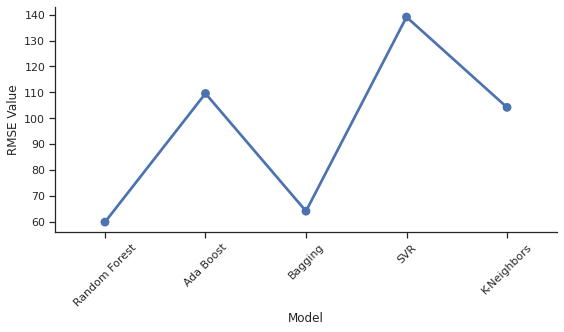

In [ ]:
# Creating a factor plot to visualize all RMSE values

factplot= sns.factorplot(x="Model",y="RMSE Value",size = 4,aspect = 2,data=rmse_df)
factplot.set_xticklabels(rotation=45)
plt.show()

Random forest is the best model compared to other models performed

# ***11.Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_***

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50,100],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [20,30],
    'criterion' : ['mse']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             verbose=1)

In [ ]:
print('Best Parameters for Random Forest Regressor Model : ',grid_search.best_params_)

Best Parameters for Random Forest Regressor Model :  {'criterion': 'mse', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}


# ***12.Perform prediction on the test set and print the mean_squared_log_error***

In [ ]:
model_rf = RandomForestRegressor(n_estimators=400,max_depth=40,random_state=0,verbose=1)
model_rf.fit(X_train,Y_train)
Y_pred_1_rf = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished


In [ ]:
#Random Forest Regressor Model Evaluation

from sklearn.metrics import mean_squared_error,r2_score

mse_1_rf = mean_squared_error(Y_test,Y_pred_1_rf)
rmse_1_rf = np.sqrt(mse_1_rf)
r_squared_1_rf = r2_score(Y_test,Y_pred_1_rf)
print('RMSE for Random Forest Model with test dataset is: ',np.round(rmse_1_rf,4))
print('R-Squared for the Random Forest Model with test dataset is : ',np.round(r_squared_1_rf,4))

RMSE for Random Forest Model with test dataset is:  59.7112
R-Squared for the Random Forest Model with test dataset is :  0.8561


In [ ]:
# Mean squared Log error

from sklearn.metrics import mean_squared_log_error

MSLE = np.sqrt(mean_squared_log_error(Y_test, Y_pred_1_rf ))
print('Mean Squared log error for RF Regressor Model : ',round(MSLE,4))

Mean Squared log error for RF Regressor Model :  0.4111
